--- Training the model ---
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9264 - loss: 0.2536 - val_accuracy: 0.9678 - val_loss: 0.1138
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9680 - loss: 0.1057 - val_accuracy: 0.9712 - val_loss: 0.1014
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9773 - loss: 0.0732 - val_accuracy: 0.9740 - val_loss: 0.0903
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9826 - loss: 0.0554 - val_accuracy: 0.9720 - val_loss: 0.0921
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9852 - loss: 0.0452 - val_accuracy: 0.9773 - val_loss: 0.0796

--- Evaluating on test data ---
313/313 - 1s - 3ms/step - accuracy: 0.9764 - loss: 0.0818

Overall Test accuracy: 97.64%

--- Displaying individual predictions ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


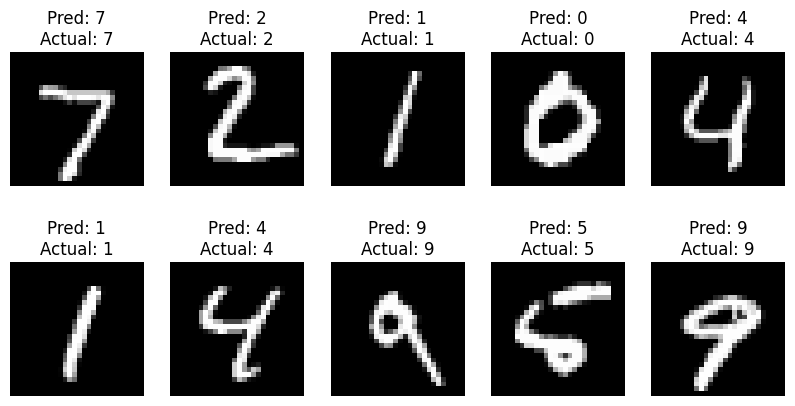

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and Preprocess the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values from 0-255 to 0.0-1.0
x_train = x_train / 255.0
x_test = x_test / 255.0

# 2. Define the FNN Model Architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# 3. Compile the Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Train the Model
print("--- Training the model ---")
model.fit(
    x_train, 
    y_train, 
    epochs=5,
    validation_split=0.1, # Use 10% of training data for validation
    verbose=1
)

# 5. Evaluate the Model's Overall Accuracy
print("\n--- Evaluating on test data ---")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nOverall Test accuracy: {test_acc*100:.2f}%")

# 6. Test and Display 10 Sample Predictions
print("\n--- Displaying individual predictions ---")

# Get predictions for just the first 10 images in the test set
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)

# Get the actual labels for those 10 images
actual_labels = y_test[:10]

# Set up a 2x5 grid to display the images
plt.figure(figsize=(10, 5))
for i in range(10):
    # Create a subplot
    plt.subplot(2, 5, i + 1)
    
    # Display the test image
    plt.imshow(x_test[i], cmap='gray')
    
    # Set the title with the prediction and the actual label
    plt.title(f"Pred: {predicted_labels[i]}\nActual: {actual_labels[i]}")
    
    # Hide the axes
    plt.axis('off')


